## Setup

In [9]:
# 1. Import Libraries
import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
# from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import time
# import io
# from sklearn.preprocessing import StandardScaler
# import joblib
# import zipfile
# import os
# from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


In [32]:
folder = 'dest_narrow/'

x_test = pd.read_csv(f"../../Preprocessing/Output/Split_Train_Test/{folder}x_test.zip")
x_train = pd.read_csv(f"../../Preprocessing/Output/Split_Train_Test/{folder}x_train.zip")
# y_test = pd.read_csv(f"../../Preprocessing/Output/Split_Train_Test/{folder}y_test.zip", dtype={'Delay Bin': object})
# y_train = pd.read_csv(f"../../Preprocessing/Output/Split_Train_Test/{folder}y_train.zip", dtype={'Delay Bin': object})
y_test = pd.read_csv(f"../../Preprocessing/Output/Split_Train_Test/{folder}y_test.zip")
y_train = pd.read_csv(f"../../Preprocessing/Output/Split_Train_Test/{folder}y_train.zip")

display(x_test.head())
display(x_train.head())
display(y_test.head())
display(y_train.head())


,cat__Aircraft Age Missing_1,cat__Destination Airport_ACV,cat__Destination Airport_ANC,cat__Destination Airport_ASE,cat__Destination Airport_ATL,cat__Destination Airport_AUS,cat__Destination Airport_BDL,cat__Destination Airport_BNA,cat__Destination Airport_BOI,cat__Destination Airport_BOS,...,num__Destination Air Temperature,num__Destination Dew Point Temperature,num__Destination Relative Humidity,num__Destination Wind Speed,num__Destination Wind Direction (sin),num__Destination Wind Direction (cos),num__Destination Wind Gust,num__Destination Visibility,num__Destination Ceiling,num__Destination Sea Level Pressure
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.042082,0.430685,0.604527,0.599709,-0.342321,1.346522,-0.197859,0.318287,-0.814299,0.019439
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.998286,-0.419350,0.585248,-1.876703,-0.102420,1.369064,-0.197859,-3.054405,-0.909945,1.425650
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.382898,0.680695,-0.146540,-0.639841,-0.342321,-1.575949,-0.197859,0.318287,-0.780139,-1.386772
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.559973,2.080754,1.039102,-0.639841,1.258128,-0.372368,-0.197859,-3.616520,-0.964600,0.722545
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.431647,-0.419350,0.192444,-0.330626,0.955898,0.839041,-0.197859,0.318287,-0.691325,2.011571


,cat__Aircraft Age Missing_1,cat__Destination Airport_ACV,cat__Destination Airport_ANC,cat__Destination Airport_ASE,cat__Destination Airport_ATL,cat__Destination Airport_AUS,cat__Destination Airport_BDL,cat__Destination Airport_BNA,cat__Destination Airport_BOI,cat__Destination Airport_BOS,...,num__Destination Air Temperature,num__Destination Dew Point Temperature,num__Destination Relative Humidity,num__Destination Wind Speed,num__Destination Wind Direction (sin),num__Destination Wind Direction (cos),num__Destination Wind Gust,num__Destination Visibility,num__Destination Ceiling,num__Destination Sea Level Pressure
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.812830,-1.269386,0.992511,-0.330626,-1.160738,-1.068467,-0.197859,0.318287,1.358243,1.855326
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.608721,-0.169340,0.192444,-0.330626,-0.793188,-1.399702,-0.197859,0.318287,-0.691325,0.956913
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.387851,-0.169340,1.006167,-1.876703,-0.102420,1.369064,-0.197859,0.318287,1.358243,-1.464895
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.219157,-1.519396,-0.872705,-0.330626,1.195799,0.392769,-0.197859,0.318287,1.358243,-0.605544
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.812830,-0.169340,1.940382,-0.639841,-1.160738,-1.068467,-0.197859,-3.054405,-0.882618,0.527237


,Delay Bin
0,2
1,0
2,0
3,0
4,2


,Delay Bin
0,0
1,0
2,2
3,0
4,3


In [39]:
# Perform RandomSearch for hyperparameters
hp_options = {
    # 'n_estimators': [10, 20, 50, 100, 150, 200, 300, 400, 500],
    'max_depth': [10, 25, 40, 50],
    'min_samples_split': [4, 6, 8],
    'min_samples_leaf': [2, 4, 6],
    'max_leaf_nodes': [2, 4, 8, 16]
}

start_time = time.time()
print(f"\nStart Time: {pd.to_datetime(start_time, unit='s')}\n")

model = RandomForestClassifier(n_estimators=200, criterion='entropy', class_weight='balanced', random_state=42)
search = RandomizedSearchCV(model, hp_options)
search.fit(x_train, y_train.values.ravel())

end_time = time.time()
duration = end_time - start_time

print(f"\nEnd Time: {pd.to_datetime(end_time, unit='s')}\n")
print("--- %s minutes ---" % (duration / 60))


Start Time: 2025-03-25 22:34:51.166684151


End Time: 2025-03-26 01:06:34.090252876

--- 151.71539281209309 minutes ---


In [40]:
print(search.best_estimator_)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=50, max_leaf_nodes=16, min_samples_leaf=6,
                       min_samples_split=4, n_estimators=200, random_state=42)


In [41]:
model = RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=50, max_leaf_nodes=16, min_samples_leaf=6,
                       min_samples_split=4, n_estimators=200, random_state=42)
model.fit(x_train, y_train.values.ravel())

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=50, max_leaf_nodes=16, min_samples_leaf=6,
                       min_samples_split=4, n_estimators=200, random_state=42)

In [42]:
model.score(x_train, y_train),model.score(x_test, y_test)

(0.3938191720739121, 0.3937234157920738)

In [43]:
#  Predictions & Evaluation
y_pred = model.predict(x_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.49      0.58    100246
           1       0.32      0.21      0.25     39141
           2       0.19      0.21      0.20     17931
           3       0.08      0.44      0.13      8664

    accuracy                           0.39    165982
   macro avg       0.32      0.34      0.29    165982
weighted avg       0.53      0.39      0.44    165982



In [44]:
#  Calculate Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# 2. Create DataFrame
cm_df = pd.DataFrame(
    cm,
    index=[f"Actual {cls}" for cls in model.classes_],
    columns=[f"Predicted {cls}" for cls in model.classes_]
)

# 3. Calculate Accuracy Score
acc_score = accuracy_score(y_test, y_pred)

In [45]:
# 4. Displaying Results
print("Confusion Matrix:")
display(cm_df)
print(f"Accuracy Score: {acc_score:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:


,Predicted 0,Predicted 1,Predicted 2,Predicted 3
Actual 0,49509,13703,8975,28059
Actual 1,12937,8188,6472,11544
Actual 2,5225,2557,3843,6306
Actual 3,2726,847,1280,3811


Accuracy Score: 0.3937

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.49      0.58    100246
           1       0.32      0.21      0.25     39141
           2       0.19      0.21      0.20     17931
           3       0.08      0.44      0.13      8664

    accuracy                           0.39    165982
   macro avg       0.32      0.34      0.29    165982
weighted avg       0.53      0.39      0.44    165982



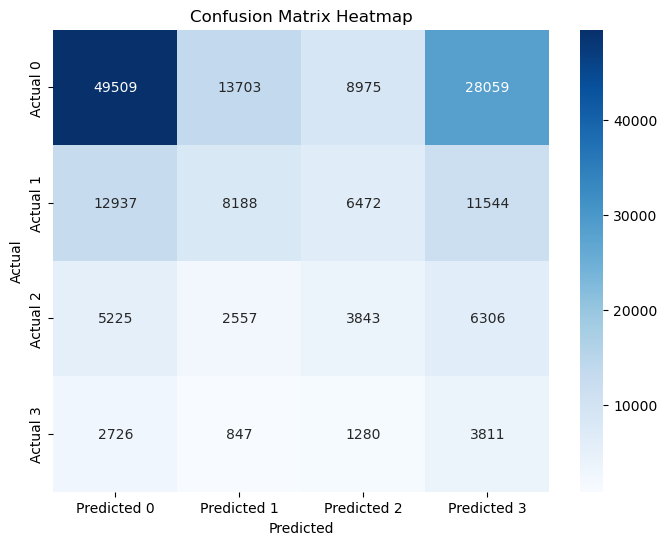

In [46]:
#  Plot Heatmap (Optional but cleaner!)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [20]:
importances = pd.Series(model.feature_importances_, index=x_train.columns).sort_values(ascending=False)
importances_df = pd.DataFrame({
    'Feature': importances.index,
    'Importance Score': importances.values
})
print("Feature Importances:")
display(importances_df.head(20))


Feature Importances:


,Feature,Importance Score
0,num__Scheduled Departure Total Minutes (sin),0.126729
1,cat__Carrier Code_WN,0.126558
2,num__Number of Seats,0.105129
3,cat__Carrier Code_OO,0.078805
4,num__Scheduled Elapsed Time,0.057537
5,cat__Carrier Code_UA,0.035040
6,num__Scheduled Departure Total Minutes (cos),0.035001
7,cat__Model_737-8,0.028108
8,cat__Manufacturer_BOEING,0.027725
9,num__Month (cos),0.026027


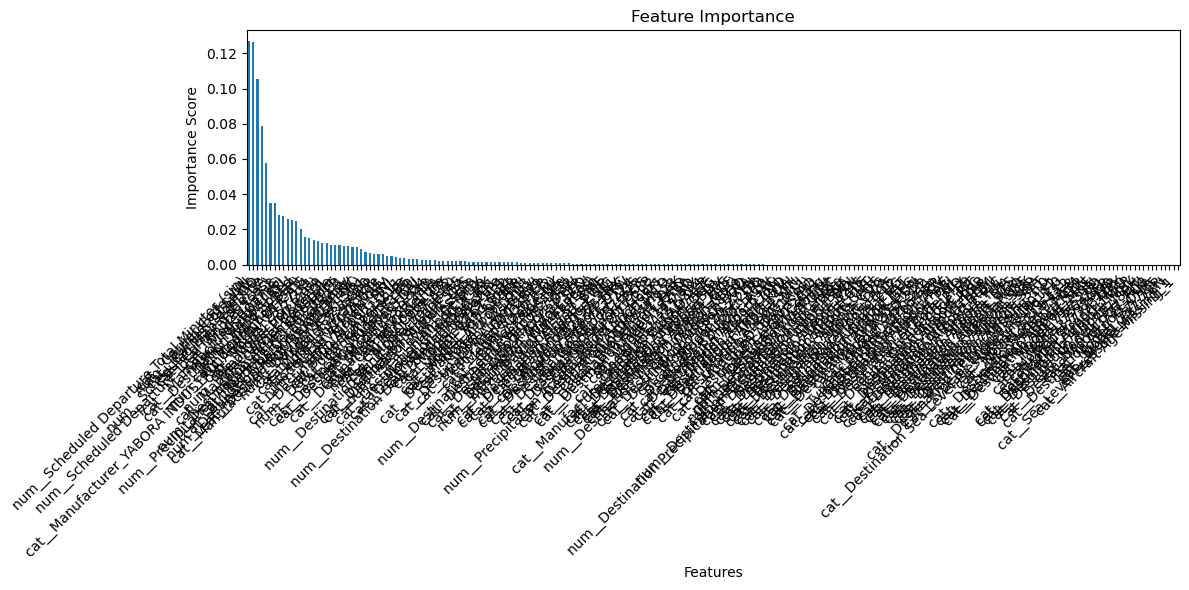

In [21]:
# Visualize the features by importance
plt.figure(figsize=(12, 6))
importances.plot(kind='bar')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()